In [5]:
import warnings
warnings.filterwarnings('ignore')

In [6]:
import tensorflow as tf
from tensorflow import keras
import matplotlib.pyplot as plt
import numpy as np

In [4]:
(X_train, y_train),(X_test, y_test)=keras.datasets.cifar10.load_data()

170508288/170498071 [==============================] - 74s 0us/step


In [7]:
X_train.shape

(50000, 32, 32, 3)

In [8]:
X_test.shape

(10000, 32, 32, 3)

In [9]:
y_train.shape

(50000, 1)

In [12]:
X_train[:1]

array([[[[ 59,  62,  63],
         [ 43,  46,  45],
         [ 50,  48,  43],
         ...,
         [158, 132, 108],
         [152, 125, 102],
         [148, 124, 103]],

        [[ 16,  20,  20],
         [  0,   0,   0],
         [ 18,   8,   0],
         ...,
         [123,  88,  55],
         [119,  83,  50],
         [122,  87,  57]],

        [[ 25,  24,  21],
         [ 16,   7,   0],
         [ 49,  27,   8],
         ...,
         [118,  84,  50],
         [120,  84,  50],
         [109,  73,  42]],

        ...,

        [[208, 170,  96],
         [201, 153,  34],
         [198, 161,  26],
         ...,
         [160, 133,  70],
         [ 56,  31,   7],
         [ 53,  34,  20]],

        [[180, 139,  96],
         [173, 123,  42],
         [186, 144,  30],
         ...,
         [184, 148,  94],
         [ 97,  62,  34],
         [ 83,  53,  34]],

        [[177, 144, 116],
         [168, 129,  94],
         [179, 142,  87],
         ...,
         [216, 184, 140],
        

In [13]:
y_train[:5]

array([[6],
       [9],
       [9],
       [4],
       [1]], dtype=uint8)

In [14]:
#since y_train is in 2d but the final output layer is in 1D so reshaping will be done here
y_train = y_train.reshape(-1,)   #-1 indicates to have the same size propertyof earlier eg.10k,50k
y_train[:5]

array([6, 9, 9, 4, 1], dtype=uint8)

In [15]:
classes = ["airplane","automobile","bird","cat","deer","dog","frog","horse","ship","truck"]


In [19]:
classes[y_train[0]]

'frog'

In [20]:
def plot_sample(X,y,index):
    plt.figure(figsize=(15,2))
    plt.imshow(X[index])
    plt.xlabel(classes[y[index]])


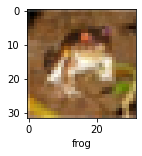

In [21]:
plot_sample(X_train, y_train,0)

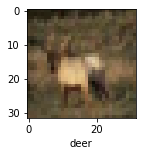

In [22]:
plot_sample(X_train, y_train,3)

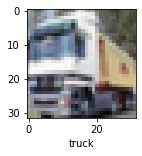

In [23]:
plot_sample(X_train, y_train,1)

Normalisation

In [24]:
X_train=X_train/255.0
X_test=X_test/255.0

Ann model

In [27]:
ann=keras.models.Sequential([
    keras.layers.Flatten(input_shape=(32,32,3)),
    keras.layers.Dense(3000,activation='relu'),
    keras.layers.Dense(1000,activation='relu'),
    keras.layers.Dense(10,activation='softmax')
])

ann.compile(optimizer='SGD',loss='sparse_categorical_crossentropy',metrics=['accuracy'])

ann.fit(X_train,y_train,epochs=10)

Epoch 1/10
1563/1563 [==============================] - 117s 73ms/step - loss: 1.8100 - accuracy: 0.3571
Epoch 2/10
1563/1563 [==============================] - 112s 72ms/step - loss: 1.6213 - accuracy: 0.4286
Epoch 3/10
1563/1563 [==============================] - 115s 73ms/step - loss: 1.5407 - accuracy: 0.4567
Epoch 4/10
1563/1563 [==============================] - 121s 77ms/step - loss: 1.4817 - accuracy: 0.4771
Epoch 5/10
1563/1563 [==============================] - 116s 74ms/step - loss: 1.4316 - accuracy: 0.4969
Epoch 6/10
1563/1563 [==============================] - 125s 80ms/step - loss: 1.3873 - accuracy: 0.5143
Epoch 7/10
1563/1563 [==============================] - 104s 67ms/step - loss: 1.3536 - accuracy: 0.5243
Epoch 8/10
1563/1563 [==============================] - 103s 66ms/step - loss: 1.3156 - accuracy: 0.5393
Epoch 9/10
1563/1563 [==============================] - 101s 65ms/step - loss: 1.2835 - accuracy: 0.5489
Epoch 10/10
1563/1563 [==============================] 

In [29]:
ann.evaluate(X_test,y_test)

313/313 [==============================] - 5s 15ms/step - loss: 1.4756 - accuracy: 0.4793


[1.4755938053131104, 0.47929999232292175]

In [28]:
from sklearn.metrics import classification_report,confusion_matrix
y_pred = ann.predict(X_test)
y_pred = [np.argmax(element) for element in y_pred]

print("Classification Report: \n",classification_report(y_test,y_pred))

Classification Report: 
               precision    recall  f1-score   support

           0       0.36      0.76      0.49      1000
           1       0.64      0.65      0.64      1000
           2       0.44      0.29      0.35      1000
           3       0.42      0.18      0.25      1000
           4       0.61      0.21      0.32      1000
           5       0.49      0.33      0.39      1000
           6       0.37      0.81      0.51      1000
           7       0.70      0.42      0.53      1000
           8       0.57      0.65      0.61      1000
           9       0.60      0.50      0.55      1000

    accuracy                           0.48     10000
   macro avg       0.52      0.48      0.46     10000
weighted avg       0.52      0.48      0.46     10000



CNN Model

In [30]:
cnn=keras.models.Sequential([

    #cnn layers
    keras.layers.Conv2D(filters=32,kernel_size=(3,3),activation='relu',input_shape=(32,32,3)),
    keras.layers.MaxPool2D((2,2)),

    keras.layers.Conv2D(filters=64,kernel_size=(3,3),activation='relu'),
    keras.layers.MaxPool2D((2,2)),

    keras.layers.Flatten(),
    keras.layers.Dense(64,activation='relu'),
    keras.layers.Dense(10,activation='softmax')
])

In [31]:
cnn.compile(optimizer='adam',loss='sparse_categorical_crossentropy',metrics=['accuracy'])

In [32]:
cnn.fit(X_train, y_train,epochs=10)

Epoch 1/10
1563/1563 [==============================] - 57s 28ms/step - loss: 1.4862 - accuracy: 0.4652
Epoch 2/10
1563/1563 [==============================] - 48s 31ms/step - loss: 1.1253 - accuracy: 0.6070
Epoch 3/10
1563/1563 [==============================] - 48s 31ms/step - loss: 0.9893 - accuracy: 0.6553
Epoch 4/10
1563/1563 [==============================] - 45s 29ms/step - loss: 0.9020 - accuracy: 0.6883
Epoch 5/10
1563/1563 [==============================] - 51s 33ms/step - loss: 0.8390 - accuracy: 0.7089
Epoch 6/10
1563/1563 [==============================] - 66s 42ms/step - loss: 0.7817 - accuracy: 0.7312
Epoch 7/10
1563/1563 [==============================] - 58s 37ms/step - loss: 0.7295 - accuracy: 0.7466
Epoch 8/10
1563/1563 [==============================] - 44s 28ms/step - loss: 0.6871 - accuracy: 0.7617
Epoch 9/10
1563/1563 [==============================] - 42s 27ms/step - loss: 0.6454 - accuracy: 0.7763
Epoch 10/10
1563/1563 [==============================] - 44s 28m

In [33]:
cnn.evaluate(X_test,y_test)

313/313 [==============================] - 2s 7ms/step - loss: 0.9130 - accuracy: 0.7032


[0.9130215048789978, 0.7031999826431274]

In [34]:
y_pred=cnn.predict(X_test)
y_pred[:5]

array([[9.81981430e-06, 4.47669954e-05, 3.26605770e-03, 9.45281982e-01,
        9.60005447e-04, 4.69957143e-02, 2.15965160e-03, 9.17091529e-06,
        1.18698250e-03, 8.59724241e-05],
       [1.94302600e-04, 2.09686870e-04, 1.27500229e-07, 5.74121316e-07,
        4.39102227e-11, 2.31373631e-09, 7.24342600e-11, 8.44829207e-10,
        9.99585330e-01, 9.97925417e-06],
       [5.14631122e-02, 3.93906869e-02, 2.41825078e-03, 9.73834191e-03,
        2.42333673e-03, 2.22403643e-04, 6.44465385e-04, 8.13827571e-03,
        8.48274529e-01, 3.72866243e-02],
       [6.57198071e-01, 7.82053918e-03, 9.74960402e-02, 3.73344775e-03,
        3.57722640e-02, 4.20180913e-05, 6.83367066e-03, 1.04990002e-04,
        1.90716192e-01, 2.82786496e-04],
       [3.97002708e-07, 1.31076895e-05, 1.50404042e-02, 3.69993621e-03,
        3.05341721e-01, 2.36310763e-04, 6.75658822e-01, 2.34200130e-07,
        8.40512428e-07, 8.20172954e-06]], dtype=float32)

In [35]:
y_classed=[np.argmax(element) for element in y_pred]
y_classed[:5]

[3, 8, 8, 0, 6]

In [38]:
y_test[:5]

array([[3],
       [8],
       [8],
       [0],
       [6]], dtype=uint8)

In [39]:
from sklearn.metrics import classification_report,confusion_matrix
y_pred = cnn.predict(X_test)
y_pred = [np.argmax(element) for element in y_pred]

print("Classification Report: \n",classification_report(y_test,y_pred))

Classification Report: 
               precision    recall  f1-score   support

           0       0.76      0.74      0.75      1000
           1       0.85      0.77      0.81      1000
           2       0.65      0.56      0.60      1000
           3       0.53      0.48      0.50      1000
           4       0.64      0.65      0.65      1000
           5       0.56      0.66      0.61      1000
           6       0.72      0.82      0.77      1000
           7       0.76      0.74      0.75      1000
           8       0.83      0.78      0.81      1000
           9       0.74      0.82      0.78      1000

    accuracy                           0.70     10000
   macro avg       0.71      0.70      0.70     10000
weighted avg       0.71      0.70      0.70     10000

